In [3]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
Categories = ['normal', 'pneumo']
flat_data_arr = []
target_arr = []
datadir = 'train/'
for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'category:{i}')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)


In [30]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.shape


(52, 67501)

In [31]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,
                                                    random_state=77,
                                                    stratify=y)


In [33]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.0001, 0.001, 0.1, 1],
              'kernel': ['rbf', 'poly']}

svc = svm.SVC(probability=True)

model = GridSearchCV(svc, param_grid)


In [ ]:
model.fit(x_train, y_train)


In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
  
print(f"The model is {accuracy*100}% accurate")

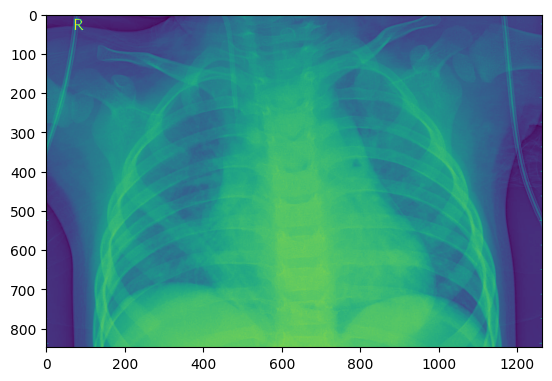

normal = 12.05437103263407%
pneumo = 87.94562896736592%
The predicted image is : pneumo


In [39]:
path = 'chest_xray/train/PNEUMONIA/person1215_bacteria_3167.jpeg'
img = imread(path)
plt.imshow(img)
plt.show()
img_resize = resize(img, (150, 150, 3))
l = [img_resize.flatten()]
probability = model.predict_proba(l)
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
